Importerer alt jeg trenger til ML

In [7]:
#Imports
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt




Inspiserer dataen jeg har hentet inn fra train.csv

In [85]:
#Inspecting data

diabetes = pd.read_csv('train.csv')

diabetes.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Target
0,1,1,1,1,21,0,0,0,1,1,...,0,4,0,0,0,0,13,4,5,1
1,2,1,0,1,26,1,0,0,1,1,...,0,3,0,0,0,0,10,5,3,0
2,3,1,1,1,29,0,0,1,0,0,...,0,3,15,5,0,1,13,6,8,1
3,4,1,1,1,27,0,0,0,1,1,...,0,2,0,0,0,1,9,6,8,0
4,5,1,1,1,26,1,0,0,0,0,...,0,2,0,0,0,0,6,5,7,0


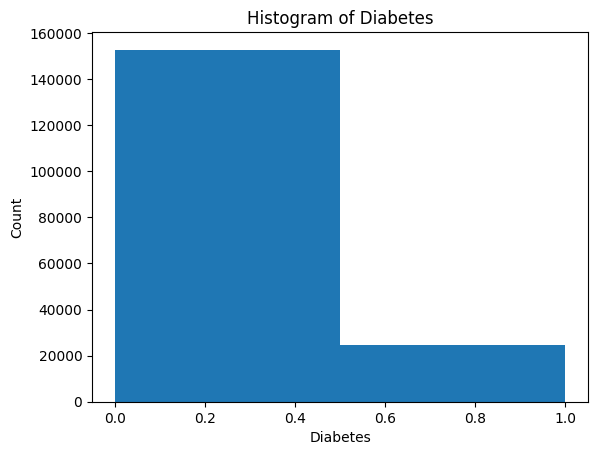

In [19]:

# Plot a histogram of the diabetes column
plt.hist(diabetes['Target'], bins=2)

# Add axis labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Histogram of Diabetes')

# Show the plot
plt.show()

Lagrer funksjonene (features) i X og labels i Y. Target er enten 0 eller 1 og forteller om noen har diabetes eller ikke

In [68]:
X = diabetes.drop('Target', axis=1)
y = diabetes['Target']


In [26]:
X.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1,21,0,0,0,1,1,...,1,0,4,0,0,0,0,13,4,5
1,2,1,0,1,26,1,0,0,1,1,...,1,0,3,0,0,0,0,10,5,3
2,3,1,1,1,29,0,0,1,0,0,...,1,0,3,15,5,0,1,13,6,8
3,4,1,1,1,27,0,0,0,1,1,...,1,0,2,0,0,0,1,9,6,8
4,5,1,1,1,26,1,0,0,0,0,...,1,0,2,0,0,0,0,6,5,7


In [69]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

Lager trening og test splits

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Henter inn en classifier vi skal trene.

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Sjekker viktigheten av vær feature

In [ ]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

Genererer prediksjoner basert på modellen vi nettop trente

In [88]:
y_pred = rf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

Teste hvor nøyaktig modellen er

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8628643510384286

Predikere testdata

In [90]:
testdata = pd.read_csv('test.csv')

y_pred2 = rf.predict(testdata)


Skrive ut resultat til en csv fil

In [92]:
prediction = pd.DataFrame(y_pred2,columns=['Target'])
prediction['Id'] = range(177577, 177577 + len(prediction))
prediction.to_csv('prediction.csv', index=False)
